# Multi Layer Perceptron or a Neural Network

## 1. Using Keras/TensorFlow

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [5]:
#dataset import
dataset = pd.read_csv('MobileData/train.csv') #You need to change #directory accordingly
dataset.head(10) #Return 10 rows of data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [6]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

In [7]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [8]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

### Building Neural Network

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                336       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 12)                204       
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 52        
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training model

In [26]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 1s 10ms/step - loss: 1.4881 - accuracy: 0.2672 - val_loss: 1.3639 - val_accuracy: 0.3250
Epoch 2/100
29/29 [==============================] - 0s 4ms/step - loss: 1.3810 - accuracy: 0.3022 - val_loss: 1.3061 - val_accuracy: 0.3800
Epoch 3/100
29/29 [==============================] - 0s 5ms/step - loss: 1.3094 - accuracy: 0.3561 - val_loss: 1.2570 - val_accuracy: 0.4300
Epoch 4/100
29/29 [==============================] - 0s 6ms/step - loss: 1.2565 - accuracy: 0.3856 - val_loss: 1.2032 - val_accuracy: 0.4650
Epoch 5/100
29/29 [==============================] - 0s 6ms/step - loss: 1.1929 - accuracy: 0.4278 - val_loss: 1.1395 - val_accuracy: 0.5050
Epoch 6/100
29/29 [==============================] - 0s 6ms/step - loss: 1.1318 - accuracy: 0.4672 - val_loss: 1.0710 - val_accuracy: 0.5100
Epoch 7/100
29/29 [==============================] - 0s 6ms/step - loss: 1.0647 - accuracy: 0.5017 - val_loss: 1.0042 - val_accuracy: 0.5650
Epoch 8/100


In [37]:
loss, acc = model.evaluate(X_test, y_test)
print(acc)

7/7 [==============================] - 0s 3ms/step - loss: 0.1573 - accuracy: 0.9400
0.9399999976158142


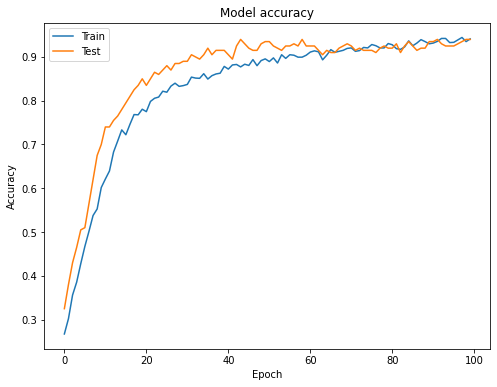

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

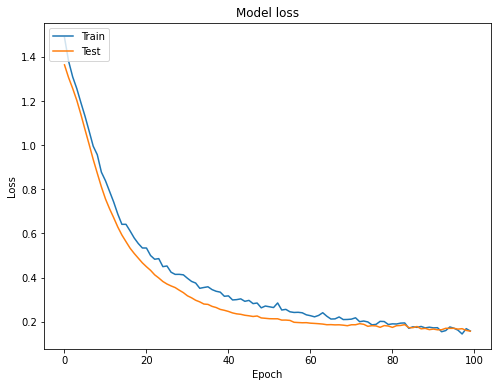

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()